In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/EUR_USD.M1.out",names=['time', 'complete', 'o', 'h', 'l', 'Close', 'v'])
log_returns = np.log(data["Close"]/data["Close"].shift(1))
data["log returns"] = log_returns
data = data[1:]
data.head()

,time,complete,o,h,l,Close,v,log returns
1,2024-01-26T00:01:00,True,1.08450,1.08452,1.08447,1.08452,22,0.000028
2,2024-01-26T00:02:00,True,1.08450,1.08460,1.08450,1.08456,44,0.000037
3,2024-01-26T00:03:00,True,1.08458,1.08460,1.08450,1.08451,40,-0.000046
4,2024-01-26T00:04:00,True,1.08447,1.08448,1.08435,1.08440,39,-0.000101
5,2024-01-26T00:05:00,True,1.08442,1.08451,1.08438,1.08444,43,0.000037


In [3]:
def simulate_stock_price(S0, mu, sigma, T=1, N=5000):
    dt = T/N  # time step
    dW = np.sqrt(dt) * np.random.randn(N)  # increments of Wiener process
    W = np.cumsum(dW)  # standard Brownian motion

    # Calculating stock price at each time step
    t = np.linspace(0, T, N)
    stock_price = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)
    
    return t, stock_price

In [4]:
sigma = np.sqrt(np.var(data["log returns"]))
mu = np.mean(data["log returns"]) + sigma**2/2
S0 = data["Close"].iloc[-1]

In [5]:
simulations = []
for i in range(10000):
    t, stock_price = simulate_stock_price(S0, mu, sigma,T=1440) #next day
    simulations.append(stock_price)

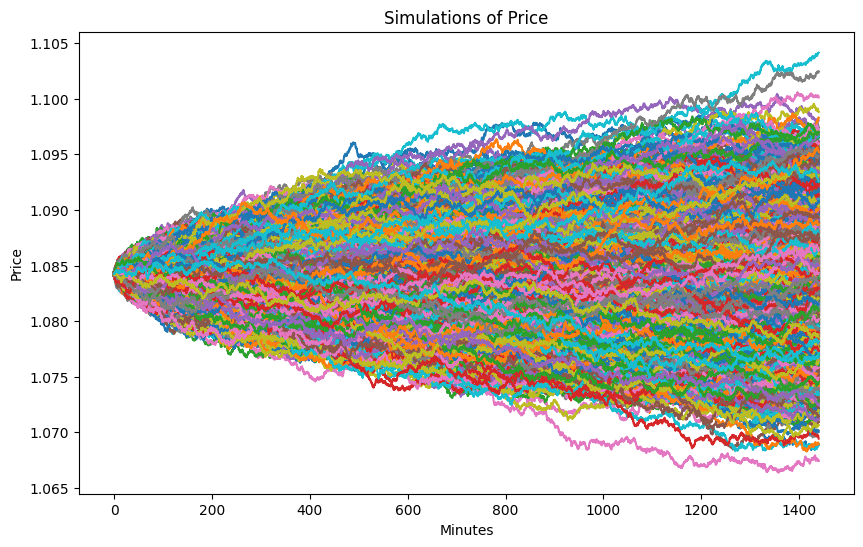

In [6]:
#plot the simulations superimposed on each other
plt.figure(figsize=(10,6))
for i in range(10000):
    plt.plot(t, simulations[i])
plt.xlabel("Minutes")
plt.ylabel("Price")
plt.title("Simulations of Price")
plt.show()

In [7]:
final_prices = [x[-1] for x in simulations]
expected_value = np.mean(final_prices)
#generate a confidence interval
confidence_interval = np.percentile(final_prices, [0.1,1,99, 99.9])
confidence_interval

array([1.07115571, 1.07397359, 1.09402757, 1.09708957])

In [8]:
#extreme bear if the price is below the lower bound
#extreme bull if the price is above the upper bound

#momentum if HTF matches extreme event
#vwap reversion if HTF does not match extreme event

In [9]:
confidence_interval

array([1.07115571, 1.07397359, 1.09402757, 1.09708957])

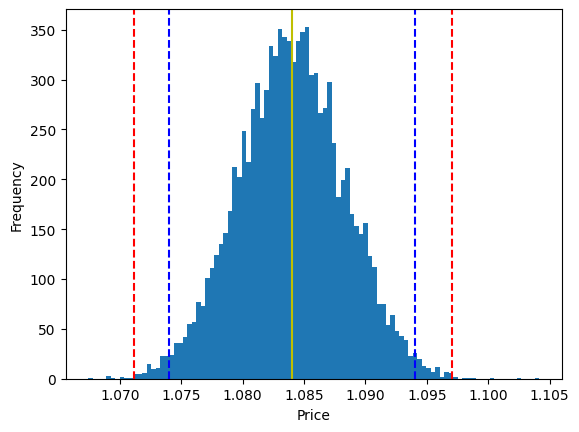

In [10]:
#plot the distribution of the final prices
plt.hist(final_prices, bins=100)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.axvline(confidence_interval[0], color='r', linestyle='--')
plt.axvline(confidence_interval[3], color='r', linestyle='--')
plt.axvline(confidence_interval[1], color='b', linestyle='--')
plt.axvline(confidence_interval[2], color='b', linestyle='--')
plt.axvline(expected_value, color='y', linestyle='-')
plt.show()


In [1]:
#Test normality of log returns
import scipy.stats as stats

stats.probplot(data["log returns"], dist="norm", plot=plt)
plt.show() #heavy tails shows log returns arent normally distributed which is required for GBM

NameError: name 'expected_value' is not defined